# STAT 301 Group Report: Income Prediction and Inference Analysis

Prepared by Group 10:
- Angela Felicia (51190304)
- Brianna Chau (76377498)
- Yiguo Cao (31501612)
- Yui Mikuriya (65625832)

## (1) Introduction

### Dataset Overview and Background
The dataset (Kohavi & Becker, 1996) chosen for the project is Adult Dataset, which can be accessed through UCI Machine Learning Repository. The Adult dataset contains demographic and income information collected by the U.S. Census Bureau. The dataset is commonly used to predict whether an individual’s income exceeds $50,000 annually, based on various demographic attributes.

- **Dataset Name**: UC Irvine Adult Dataset
- **Data Source**: 1994 U.S. Census database by Ronny Kohavi and Barry Becker, downloaded from https://archive.ics.uci.edu/ml/datasets/adult 
- **Total Observations**: 32,561
- **Total Variables**: 15

### Variables and Their Types


| Variable Index | Variable Name       | Type      | Description |
|----------------|---------------------|-----------|-------------|
| 0              | age                 | continuous       | Age of the individual |
| 1              | workclass           | categorical    | Employment sector (e.g., Private, Self-emp-not-inc, State-gov) |
| 2              | fnlwgt              | continuous       | Final weight, representing the number of people the observation represents in the population |
| 3              | education           | categorical    | Highest level of education attained |
| 4              | education-num       | continuous       | Numerical representation of education level |
| 5              | marital-status      | categorical    | Marital status (e.g., Never-married, Married-civ-spouse) |
| 6              | occupation          | categorical    | Type of occupation (e.g., Adm-clerical, Exec-managerial) |
| 7              | relationship        | categorical    | Relationship of the individual to the household (e.g., Husband, Not-in-family) |
| 8              | race                | categorical    | Race of the individual (e.g., White, Black) |
| 9              | sex                 | categorical    | Gender (Male/Female) |
| 10             | capital-gain        | continuous       | Capital gains earned |
| 11             | capital-loss        | continuous       | Capital losses incurred |
| 12             | hours-per-week      | continuous       | Average hours worked per week |
| 13             | native-country      | categorical    | Country of origin |
| 14             | income              | categorical    | Income level (<=50K, >50K) |

**Table 1.1**: Description of variables in the U.S. Census Adult dataset

### Descriptive Statistics

- **Age**: Ranges from 17 to 90, with an average age of 38.6 years.
- **Education-num**: Has values from 1 to 16, representing various education levels.
- **Capital-gain**: Ranges from 0 to 99,999, with most values concentrated around zero, indicating that high capital gains are rare.
- **Capital-loss**: Similar to capital gain, most values are zero.
- **Hours-per-week**: Has a mean of 40.4 hours, aligning with typical full-time work expectations.
- **Income**: Target variable, classified into two categories: <=50K and >50K.

This dataset includes both categorical and numerical variables, making it suitable for exploring relationships between demographic attributes and income levels. Further exploration and preprocessing may involve handling missing values or encoding categorical features. We will start by loading the libraries needed.

In [4]:
# Run this cell before continuing.
library(broom)
library(repr)
library(infer)
library(gridExtra)
library(faraway)
library(mltools)
library(leaps)
library(glmnet)
library(cowplot)
library(modelr)
library(tidyverse)
library(ggplot2)
library(dplyr)
library(GGally)
library(patchwork)
library(knitr)

Loading required package: Matrix

Loaded glmnet 4.1-8


Attaching package: ‘modelr’


The following objects are masked from ‘package:mltools’:

    mse, rmse


The following object is masked from ‘package:broom’:

    bootstrap


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ modelr::bootstrap() masks broom::bootstrap()
✖ dplyr::combine()    masks gridExtra::combine()
✖ tidyr::expand()     masks Matrix::expand()
✖ dplyr::filter()     masks stats::filter()
✖ dplyr::lag()        masks stats::lag()
✖ modelr::mse()       masks mltools::mse()
✖ tidyr::pack()       masks Matrix::pack()
✖ tidyr::replace_na() masks mltools::replace_na()
✖ modelr::rmse()      masks mltools::rmse()
✖ lubridate::stamp(

Now we will load the dataset.

In [6]:
# Main Developer: Angela

library(tidyverse)
url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"

# Read the dataset
income <- read_csv(url, 
                   col_names = FALSE,
                    na = "?")

colnames(income) <- c(
    "age", "workclass", "fnlwgt", "education", "education_num",
    "marital_status", "occupation", "relationship", "race",
    "sex", "capital_gain", "capital_loss", "hours_per_week",
    "native_country", "income"
)

head(income)

Rows: 32561 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (9): X2, X4, X6, X7, X8, X9, X10, X14, X15
dbl (6): X1, X3, X5, X11, X12, X13

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age workclass        fnlwgt education education_num marital_status    
1 39  State-gov         77516 Bachelors 13            Never-married     
2 50  Self-emp-not-inc  83311 Bachelors 13            Married-civ-spouse
3 38  Private          215646 HS-grad    9            Divorced          
4 53  Private          234721 11th       7            Married-civ-spouse
5 28  Private          338409 Bachelors 13            Married-civ-spouse
6 37  Private          284582 Masters   14            Married-civ-spouse
  occupation        relationship  race  sex    capital_gain capital_loss
1 Adm-clerical      Not-in-family White Male   2174         0           
2 Exec-managerial   Husband       White Male      0         0           
3 Handlers-cleaners Not-in-family White Male      0         0           
4 Handlers-cleaners Husband       Black Male      0         0           
5 Prof-specialty    Wife          Black Female    0         0           
6 Exec-managerial   Wife          White Female    0         0           
  hours_per_week native_country income
1 40             United-States  <=50K 
2 13             United-States  <=50K 
3 40             United-States  <=50K 
4 40             United-States  <=50K 
5 40             Cuba           <=50K 
6 40             United-States  <=50K

Table 1.2: Preview of the Adult Dataset

## **2. Research Question**

**How do demographic factors influence the likelihood of an individual's annual income exceeding $50,000?**

This question aims to explore potential relationships between various demographic variables and income levels, without pre-determining which factors are most influential. The goal is to identify patterns and significant predictors through data analysis rather than relying on preliminary assumptions. By leveraging the rich demographic data in the Adult dataset, we aim to uncover which variables, such as age, education, gender, race, or occupation, have a significant impact on income categories.

In our initial discussions, each group member explored different aspects of the dataset, focusing on specific potential relationships. After reviewing our individual findings, we decided to first investigate which demographic factors may influence income levels, forming the basis of our analysis.

### Literature Context
Our research question aligns with recent studies that have explored the relationship between demographic factors and income levels. Previous work in this area provides a strong foundation for our investigation and highlights the importance of our chosen variables. 

Jo (2023) conducted a comprehensive study on income prediction using the same Adult dataset from the UCI Machine Learning Repository. Their findings demonstrated that certain demographic factors were particularly influential in predicting income levels. Specifically, they found that capital gain, education level, relationship status, and occupation were among the most important predictor variables. This supports our decision to include these factors in our analysis.

Moreover, Azzollini et al. (2023) studied how demographic differences contribute to income inequality across OECD countries. Their research found that demographic factors accounted for over 40% of the variation in household earnings inequality across 28 OECD countries. This highlights the significant role that demographic variables have in income disparities, further justifying our focus on these factors.


### **Description of Variables**

At this stage, we have not pre-defined which variables will ultimately be included in the final model. Instead, we will evaluate and assess a range of potential explanatory variables during the analysis. These may include:
- Age: This variable allows us to assess whether older individuals tend to earn higher incomes compared to younger ones.
- Education Level: This variable can help us understand if higher education levels correlate with increased income, offering insights into the value of educational attainment in the job market.
- Gender: This variable can reveal potential income disparities between males and females. By analyzing income differences based on gender, we can better understand the impact of gender on earning potential, including factors such as occupational segregation and the gender pay gap.
- Race: This variable enables us to explore how different racial or ethnic backgrounds may affect income levels. Understanding income disparities across races can highlight systemic issues within the job market, discrimination, and socioeconomic factors that contribute to unequal earning opportunities.


### **Objective**

This research question encompasses both **prediction** and **inference**:

- **Prediction:** To develop a model capable of predicting the likelihood of an individual earning more than $50,000 annually based on key demographic factors.

- **Inference:** To understand the nature and strength of the relationships between various demographic factors and income, gaining valuable insights into the demographic factors of earning potential.

### Data Wrangling for Logistic Regression Analysis

In this step, we will remove any missing values from the dataset that were represented by question marks (?). Moreover, we will also transforms the income column in the income dataset into a factor variable. By converting income to a factor, we enable R to treat it as categorical data, in this case binary, which is essential for analyses where income represents discrete categories rather than continuous numeric values. This step is particularly useful for statistical modeling and visualization, when income serves as the categorical outcome variable.

In [7]:
# Main Developer: Angela

# Convert income to a factor
income <- income %>%
  mutate(income = as.factor(income))

# Remove rows with missing values
income_clean <- income %>%
  drop_na()

summary(income_clean)

      age         workclass             fnlwgt         education        
 Min.   :17.00   Length:30162       Min.   :  13769   Length:30162      
 1st Qu.:28.00   Class :character   1st Qu.: 117627   Class :character  
 Median :37.00   Mode  :character   Median : 178425   Mode  :character  
 Mean   :38.44                      Mean   : 189794                     
 3rd Qu.:47.00                      3rd Qu.: 237628                     
 Max.   :90.00                      Max.   :1484705                     
 education_num   marital_status      occupation        relationship      
 Min.   : 1.00   Length:30162       Length:30162       Length:30162      
 1st Qu.: 9.00   Class :character   Class :character   Class :character  
 Median :10.00   Mode  :character   Mode  :character   Mode  :character  
 Mean   :10.12                                                           
 3rd Qu.:13.00                                                           
 Max.   :16.00                               

After removing missing values, the dataset now contains 30,162 observations. 

To simplify the analysis and ensure computational efficiency, we will proceed by sampling a subset of these observations. This will allow us to maintain manageable data size while preserving the representativeness of the dataset.

This code takes a random 10% sample from the income dataset to create a smaller subset (income_sample). The set.seed(1234) function ensures reproducibility, meaning the same sample will be selected each time the code is run. sample_n() then selects 10% of the rows based on the dataset's total row count. Finally, head(income_sample) displays the first few rows of the sampled data.

In [9]:
# Main Developer: Yui
# Contributor: Angela

set.seed(1234)

sample_size <- 0.1*nrow(income_clean)

income_sample <- income_clean %>% 
  sample_n(size = sample_size)

train_indices <- sample(seq_len(nrow(income_sample)), size = 0.8 * nrow(income_sample))
train_data <- income_sample[train_indices, ]
test_data <- income_sample[-train_indices, ]

head(train_data)

age workclass fnlwgt education    education_num marital_status    
1 46  Private   155654 HS-grad       9            Married-civ-spouse
2 22  Private   145964 Bachelors    13            Never-married     
3 59  Private    31137 HS-grad       9            Married-civ-spouse
4 46  Private   360096 Bachelors    13            Married-civ-spouse
5 50  Private   104501 HS-grad       9            Married-civ-spouse
6 24  Private   301199 Some-college 10            Never-married     
  occupation      relationship race  sex    capital_gain capital_loss
1 Other-service   Wife         White Female     0        0           
2 Sales           Own-child    White Male       0        0           
3 Craft-repair    Husband      White Male       0        0           
4 Exec-managerial Husband      White Male   15024        0           
5 Craft-repair    Husband      White Male       0        0           
6 Tech-support    Own-child    White Female     0        0           
  hours_per_week native_country income
1 40             United-States  <=50K 
2 40             United-States  <=50K 
3 40             United-States  >50K  
4 60             United-States  >50K  
5 40             United-States  >50K  
6 20             United-States  <=50K

Table 2.1 Sampled Data Preview

## 3. Exploratory Data Analysis and Visualization



First, we will create a bar plot to visualize the distribution of the response variable `income`, highlighting the frequency of individuals earning <=50K and >50K with distinct colors for each income level. We use `geom_bar` to plot the distribution.


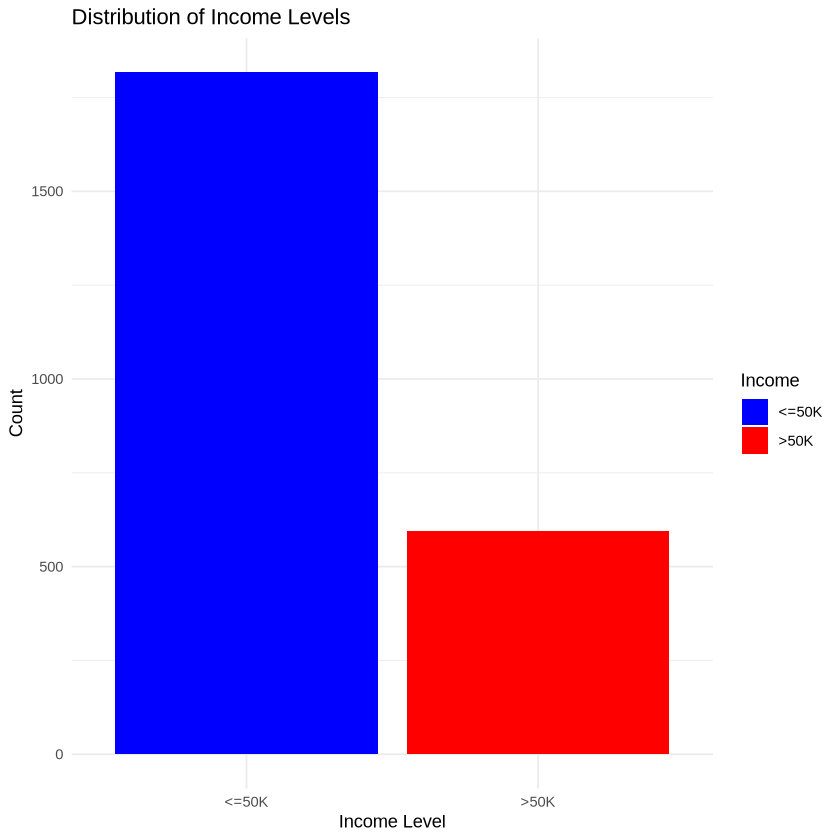

In [10]:
# Main Developer: Yiguo

ggplot(train_data, aes(x = income, fill = income)) +
  geom_bar() +
  labs(
    title = "Distribution of Income Levels",
    x = "Income Level",
    y = "Count",
    fill = "Income"
  ) +
  theme_minimal() +
  scale_fill_manual(values = c("<=50K" = "blue", ">50K" = "red"))


Figure 3.1 Distribution of Income

The bar plot of income levels reveals a significant imbalance between the two income groups, with the majority of individuals earning `<=50K` and a smaller proportion earning `>50K`. This skewed distribution reflects real-world income disparities, where higher income levels are less common. In addition, the imbalance is important to consider for analysis and modeling, as it may lead to biases toward the majority class (`<=50K`). To address the imbalance, through techniques like resampling, will be essential to ensure fair and accurate insights, particularly for the underrepresented `>50K` group.


### Dropping Variables:

To streamline the analysis and concentrate on the most relevant variables, we have updated the dataset by excluding columns that do not directly contribute to addressing our research question. Specifically:
- `fnlwgt`: This variable represents the final weight, indicating the number of people each observation stands for in the population. However, it does not provide meaningful insights into the individual's income potential and thus is not useful for our predictive analysis.
- `native_country`: This variable causes challenges due to its high cardinality, which includes numerous countries of origin. Including it would introduce unnecessary complexity, therefore, it is excluded to maintain focus on more impactful demographic factors.
- `education`: This variable is a categorical representation of the education level, but its information is already captured by the numerical variable `education_num`, which provides a more precise, continuous measure of education attainment.
- `relationship`: This variable overlaps with `marital_status`, providing relational categories that may be redundant when `marital_status` is included.
- `workclass`: `workclass` and `occupation` are likely correlated. Including both may introduce redundancy or multicollinearity in predictive models.
- `capital_gain` and `capital_loss`: Both variables often contain sparse data, with most values being zero. Including them may add unnecessary noise to the analysis .

By removing these variables, the analysis will become more manageable and focused, allowing for a clearer understanding of how key demographic factors influence the likelihood of earning over $50,000 annually.

Then we select specific columns of interest from the dataset for focused analysis. By using the `select` function, irrelevant variables will be removed, retaining only the variables tha we are insterested in and the response variable.

In [11]:
# Main Developer: Angela
# Contributor: Yiguo

train_data <- train_data %>%
  select(-native_country, -fnlwgt, -education, -relationship, -workclass, -capital_gain, -capital_loss) 

head(train_data)

age education_num marital_status     occupation      race  sex   
1 46   9            Married-civ-spouse Other-service   White Female
2 22  13            Never-married      Sales           White Male  
3 59   9            Married-civ-spouse Craft-repair    White Male  
4 46  13            Married-civ-spouse Exec-managerial White Male  
5 50   9            Married-civ-spouse Craft-repair    White Male  
6 24  10            Never-married      Tech-support    White Female
  hours_per_week income
1 40             <=50K 
2 40             <=50K 
3 40             >50K  
4 60             >50K  
5 40             >50K  
6 20             <=50K

Table 3.1: Preview of the dataset sample

### For continuous variables:
Next, we aim to visually examine the relationships between each input variable and the response variable, as well as identify any potential associations among the input variables themselves.
This code creates pairwise plots for continuous variables (`age`, `hours_per_week`, and `education_num`) selected from the income_sample dataset. By focusing on these numerical variables, the `ggpairs` function provides an overview of their distributions, relationships, and potential correlations. 

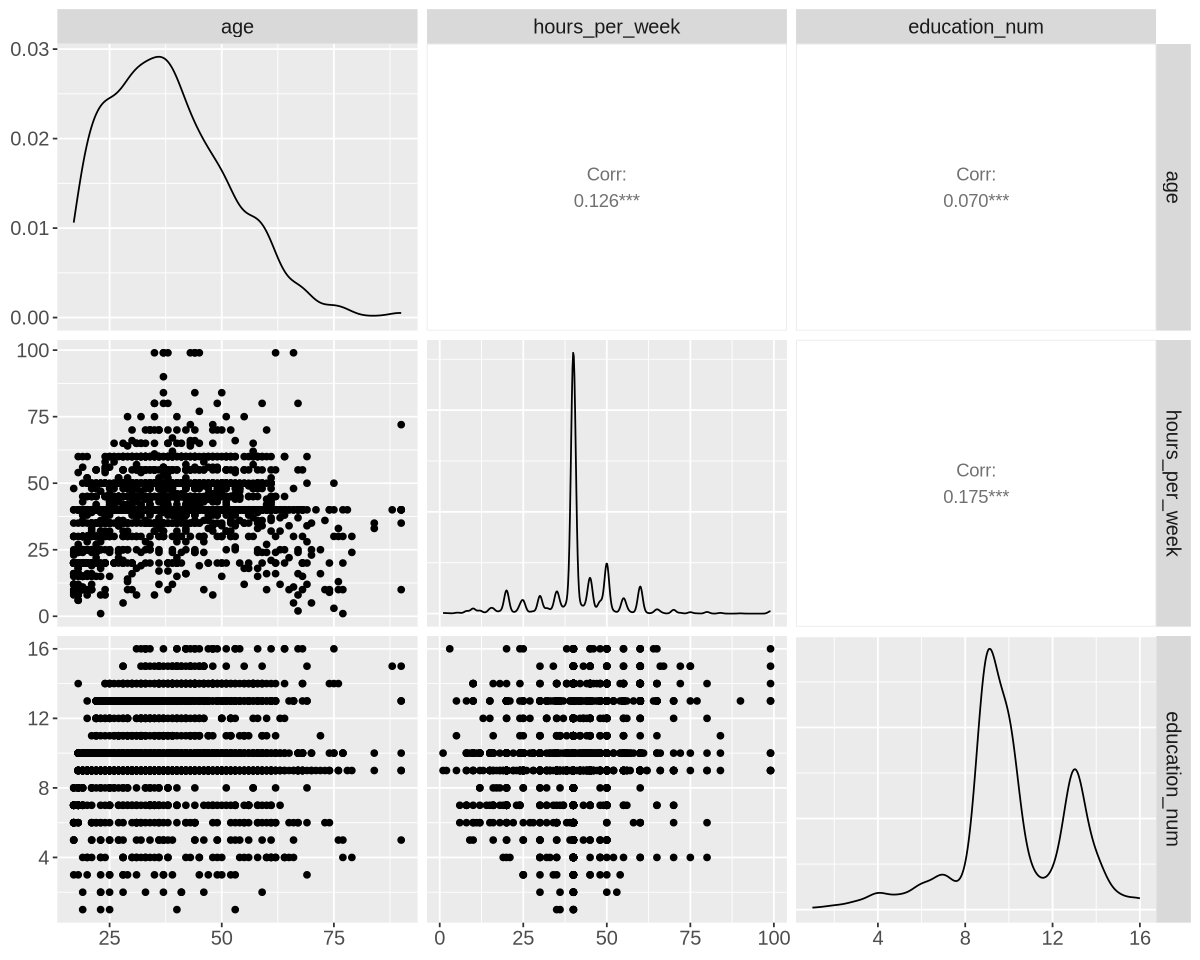

In [12]:
# Main Developer: Brianna
# Contributor: Yiguo
options(repr.plot.width = 10, repr.plot.height = 8)
continuous_data <- train_data %>%
  select(age, hours_per_week, education_num)

ggpairs(continuous_data) +
  theme(
    text = element_text(size = 15),
    plot.title = element_text(face = "bold"),
    axis.title = element_text(face = "bold")
  )


Figure 3.2: Pairwise plot among continuous relationships


The pairwise plots above show that the distributions and relationships among `age`, `hours_per_week`, and `education_num`. The distribution of `age` is right-skewed, with most individuals concentrated in younger age groups, while `hours_per_week` has a strong peak around 40, reflecting standard full-time work hours. For the `education_num` variable, it shows a bimodal distribution, with peaks corresponding to high school (around 9) and college or university completion (around 13).

The relationships between variables are weak, as correlation coefficients are relatively low (< 0.6). This suggests that multicollinearity is unlikely to be an issue among these predictors. For instance, `age` and `hours_per_week` have a correlation of 0.121, showing minimal association. While `hours_per_week` and `education_num` (correlation: 0.174) suggest a weak positive relationship, with higher education levels potentially linked to longer working hours. 

### For categorical variables:

We want to use bar plots to clearly visualize the relationship between `marital_status`, `race`, `occupation`, and `sex` with income levels (`<=50K` and `>50K`). We use `geom_bar()` to display the distribution of income within each category for these variables.


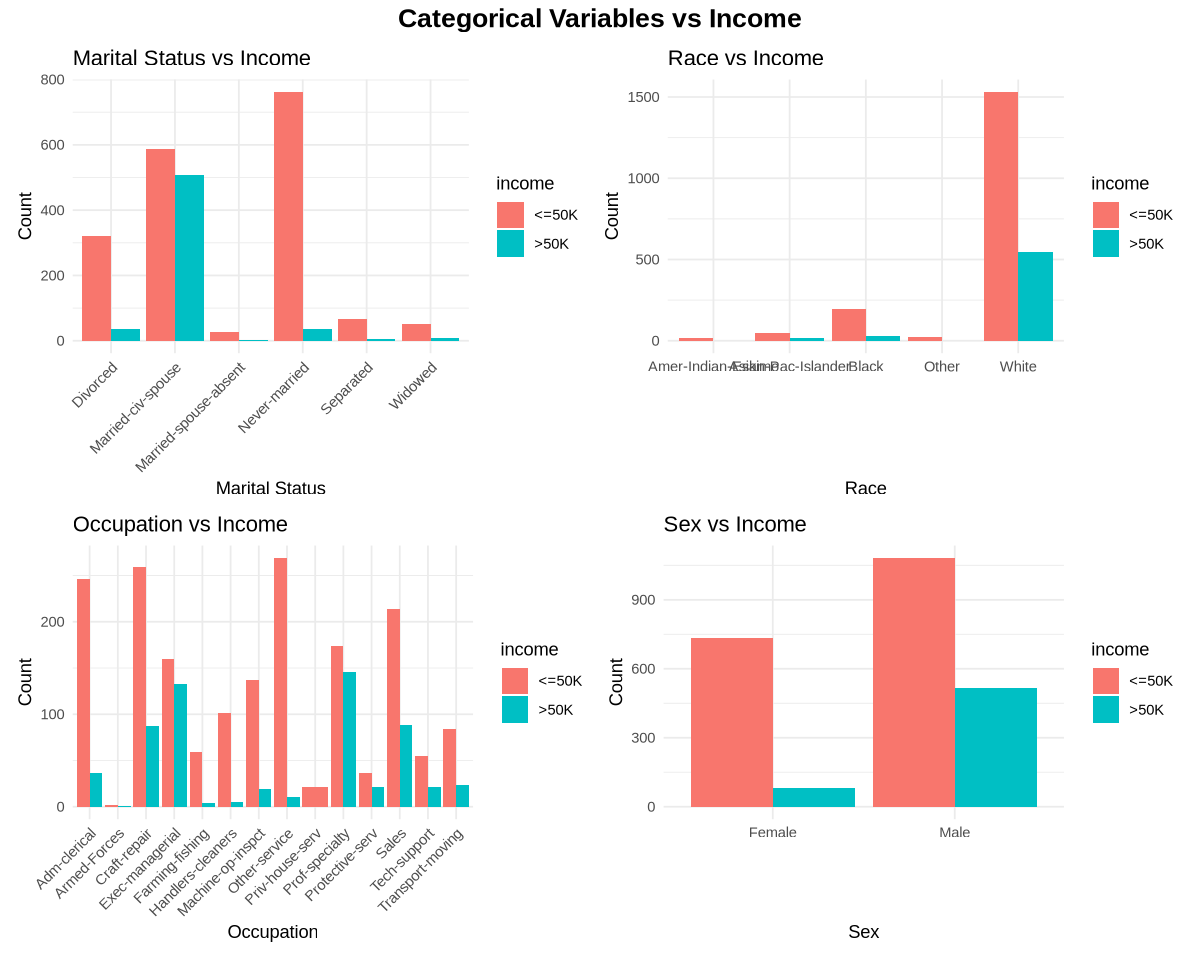

In [13]:
# Main Developer: Yiguo

marital_plot <- ggplot(train_data, aes(x = marital_status, fill = income)) +
  geom_bar(position = "dodge") +
  labs(title = "Marital Status vs Income", x = "Marital Status", y = "Count") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))


race_plot <- ggplot(train_data, aes(x = race, fill = income)) +
  geom_bar(position = "dodge") +
  labs(title = "Race vs Income", x = "Race", y = "Count") +
  theme_minimal()


occupation_plot <- ggplot(train_data, aes(x = occupation, fill = income)) +
  geom_bar(position = "dodge") +
  labs(title = "Occupation vs Income", x = "Occupation", y = "Count") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

sex_plot <- ggplot(train_data, aes(x = sex, fill = income)) +
  geom_bar(position = "dodge") +
  labs(title = "Sex vs Income", x = "Sex", y = "Count") +
  theme_minimal()


combined_plot <- (marital_plot | race_plot) / (occupation_plot | sex_plot)

combined_plot <- combined_plot +
  plot_annotation(
    title = "Categorical Variables vs Income",
    theme = theme(
      plot.title = element_text(size = 16, face = "bold", hjust = 0.5)
    )
  )

print(combined_plot)

Figure 3.3: Distribution of categorical variables


**1. Marital Status vs Income**  
The bar plot for marital status indicates significant variations in income distribution across different marital groups. Individuals who are "Married-civ-spouse" have a higher likelihood of earning `>50K`, as shown by the relatively large blue bars in this category. In contrast, groups like "Never-married" and "Separated" predominantly fall into the `<=50K` income category,suggesting that marital status might be an important factor in determining income levels. Besides, we could collapese categories such as married vs. not married, as it could simplify the variable while retaining its predictive value.

**2. Race vs Income**  
The race plot highlights that the "White" racial group has the highest representation in both income categories. However, The race variable shows significant class imbalance, with the "White" category significantly dominating the distribution. This imbalance could reduce the variable's predictive value since most observations fall into one category. It is thus that the variable `race` may be removed.

**3. Occupation vs Income**  
The occupation plot reveals distinct patterns in income distribution across job categories. Roles like "Exec-managerial" and "Prof-specialty" have a higher proportion of individuals earning `>50K`, suggesting that these professions are strongly associated with higher income. But, `occupation` has a large number of levels and a substantial amount of missing data. Encoding these levels as dummy variables could increase computational complexity and potentially lead to overfitting. Therefore, dropping the column may reduce errors made by the model.

**4. Sex vs Income**  
The sex plot indicates a noticeable disparity in income levels between males and females. Males are more represented in the `>50K` category compared to females, who predominantly fall into the `<=50K` group. This disparity reflects potential gender-based differences in earning opportunities or pay levels.


In this step, we refine the `income_sample` dataset by removing the `occupation` and `race` variables. By dropping these variables, we simplify the dataset, reduce computational complexity, and minimize potential biases introduced by imputation or overrepresentation. This ensures a cleaner dataset for further analysis and modeling.


In [14]:
# Main Developer: Yiguo

train_data <- train_data %>%
  select(-occupation, -race)

head(train_data)


age education_num marital_status     sex    hours_per_week income
1 46   9            Married-civ-spouse Female 40             <=50K 
2 22  13            Never-married      Male   40             <=50K 
3 59   9            Married-civ-spouse Male   40             >50K  
4 46  13            Married-civ-spouse Male   60             >50K  
5 50   9            Married-civ-spouse Male   40             >50K  
6 24  10            Never-married      Female 20             <=50K

Table 3.2: Refined dataset preview

Finally, the following code generates summary tables for both continuous and categorical variables in the dataset. 
- For continuous variables, the code computes key summary statistics: mean, standard deviation, median, variance, maximum, and minimum. The data is reshaped into a long format for easier processing, and the `group_by()` function ensures calculations are performed separately for each variable.
- For categorical variables, the code calculates the count and proportion of each category within the variables. By reshaping the dataset and grouping by variable and category, this method helps us to understand the distribution patterns across `income`, `marital_status`, and `sex`.

In [15]:
# Main Developer: Yiguo

# Summary for continuous variables
continuous_summary <- train_data %>%
  select(age, hours_per_week, education_num) %>%  
  pivot_longer(cols = everything()) %>%  
  group_by(name) %>% 
  summarise(
    mean = mean(value, na.rm = TRUE),
    sd = sd(value, na.rm = TRUE),
    median = median(value, na.rm = TRUE),
    variance = var(value, na.rm = TRUE),
    max = max(value, na.rm = TRUE),
    min = min(value, na.rm = TRUE),
    .groups = "drop"
  )


# Summary for continuous variables
categorical_summary <- train_data %>%
  select(income, marital_status, sex) %>%  
  pivot_longer(cols = everything(), names_to = "Variable", values_to = "Category") %>%  
  group_by(Variable, Category) %>%  
  summarise(
    Count = n(),
    Proportion = Count / sum(Count), 
    .groups = "drop"
  )

continuous_summary
categorical_summary

name           mean     sd        median variance   max min
1 age            38.19071 13.399089 37     179.535575 90  17 
2 education_num  10.10945  2.581007 10       6.661595 16   1 
3 hours_per_week 40.81633 11.896025 40     141.515403 99   1

Variable       Category              Count Proportion
1  income         <=50K                 1817  1         
2  income         >50K                   595  1         
3  marital_status Divorced               357  1         
4  marital_status Married-civ-spouse    1094  1         
5  marital_status Married-spouse-absent   30  1         
6  marital_status Never-married          799  1         
7  marital_status Separated               71  1         
8  marital_status Widowed                 61  1         
9  sex            Female                 815  1         
10 sex            Male                  1597  1

Table 3.3 & 3.4: Summary tables of continuous and categorical variables

####  For Continuous Variables:

Based on the summary statistics for continuous variables (`age`, `education_num`, and `hours_per_week`), the average age is approximately 38 years, with a standard deviation of 13.35, indicating it spreads around the mean. The minimum and maximum ages are 17 and 90, respectively, shows a wide range of individuals. Similarly, the average education level (`education_num`) is around 10 years, which corresponds to a high school graduate or some college education, with a relatively low standard deviation of 2.55. For `hours_per_week`, the average value is about 40.85 hours, with a standard deviation of 11.96 and a maximum of 99 hours, suggesting the presence of individuals working significantly long hours.

#### For Categorical Variables

The categorical variables (`income`, `marital_status`, and `sex`) reveal some interesting patterns. The `income` distribution is highly imbalanced, with the majority of observations (2271) in the `<=50K` category and only 745 in the `>50K` category. For `marital_status`, the most common category is "Married-civ-spouse" with 1373 individuals, while categories such as "Widowed" (72) and "Married-spouse-absent" (38) are much less frequent. This imbalance highlights potential predictors of income that could influence the model. Finally, for the `sex` variable, there are more males (2011) than females (1005) in the dataset, which may also affect income predictions given gender disparities in work opportunities and pay scales. These patterns suggest the importance of considering imbalance and representation when interpreting relationships with the target variable, `income`.

# Methods and Plan

## Proposed Method: Logistic Regression with Backward Selection, Comparison of AIC between the reduced and full model, and using the ROC Curve to assess model performance

- Why is this method appropriate?

Logistic regression is appropriate for modeling binary outcome variables, such as the income categories in this dataset (<=50K and >50K). It allows for the estimation of the probability that an individual falls into a particular income category based on multiple predictor variables. Since our research question is about understanding the influence of several demographic factors on income, logistic regression would be an appropriate method for both prediction and inference.

Backward selection is appropriate, as it is a stepwise regression technique that begins with a model containing all candidate predictor variables. It iteratively removes the least significant variable based on the p-value, and only the variables that contribute meaningfully to the model will remain. This method is beneficial in identifying the most impactful demographic factors without overcomplicating the model with unnecessary variables.

Then, we would fit a full logistic regression model using all relevant demographic predictors.
Apply backward selection to iteratively remove non-significant variables, refining the model to include only those predictors that have a meaningful impact on income levels.

Finally, we will assess the reduced model's performance using AUC and check for adherence to logistic regression assumptions. We will then analyze the selected variables to understand their influence on the likelihood of earning >50K, providing both predictive insights and inferential conclusions.


- Which assumptions are required, if any, to apply the method selected?

We will assume that each income status is independent of other observations. We will also be assuming that predictor variables are not highly correlated with one another. Moreover, we are also assuming that the sample size is large enough to provide reliable estimates for the predictors. 

- What are the potential limitations or weaknesses of the method selected?

Some potential limitations of the method selected include overfitting. Including too many predictors might lead to a model that performs well on training data but not on unseen data. However, we have also used backward selection to reduce the number of variables and minimize overfitting.
Another possible weakness of this method is that backward selection typically evaluates variables individually and may miss interaction effects between predictors. 

## Proposed Plan:
- Fit a full logistic regression model with all relevant demographic predictors included.
- Apply backward selection and iteratively remove non-statistically significant variables, and only retain predictors that have significant impacts on income levels.
- Evaluate the reduced model and compare it with the initial full model by using Akaike Information Criterion (AIC) to identify the model that best balances fit and complexity.
- Evaluate the model with the better AIC using the Area Under the Curve (AUC) to assess the model's performance and measure its ability to distinguish between income groups effectively.

By using this approach, we will develop a model that accurately represents the relationship between demographic characteristics and income levels.

# Implementation of a proposed model

We will now start with fitting a full logistic regression model using all relevant predictors. Before that, we will also avoid the dummy variable trap by using the model.matrix function.

In [16]:
# Main Developer: Angela
# Contributor: Yiguo

design_matrix <- model.matrix(~ . - income - 1, data = train_data)
dummy_df <- as.data.frame(design_matrix)
names(dummy_df) <- make.names(names(dummy_df), unique = TRUE)

dummy_df$income <- train_data$income
selected_vars <- colnames(dummy_df)[grep("^(age|education_num|marital_status|sex|hours_per_week)", colnames(dummy_df))]

selected_vars <- intersect(selected_vars, colnames(dummy_df))

formula_reduced <- as.formula(paste("income ~", paste(selected_vars, collapse = " + ")))

full_model <- glm(formula_reduced, data = dummy_df, family = binomial)
summary(full_model)



Call:
glm(formula = formula_reduced, family = binomial, data = dummy_df)

Coefficients: (1 not defined because of singularities)
                                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)                         -8.180984   0.608909 -13.435  < 2e-16 ***
age                                  0.029916   0.005301   5.643 1.67e-08 ***
education_num                        0.377410   0.026877  14.042  < 2e-16 ***
marital_statusDivorced              -0.790719   0.434376  -1.820  0.06870 .  
marital_statusMarried.civ.spouse     1.258083   0.413440   3.043  0.00234 ** 
marital_statusMarried.spouse.absent -1.180112   0.792439  -1.489  0.13643    
marital_statusNever.married         -1.208575   0.448771  -2.693  0.00708 ** 
marital_statusSeparated             -0.868688   0.672736  -1.291  0.19661    
marital_statusWidowed                      NA         NA      NA       NA    
sexMale                              0.363311   0.169035   2.149  0.03161 *  
hours_per_we

### Next, we will perform a backward selection using the leaps::regsubsets() function. 


In [17]:
# Main Developer: Angela

backward_sel <- regsubsets(
  x =  income ~ ., nvmax = 10,
  data = train_data,
  method = "backward"
)

backward_sel_summary <- summary(backward_sel)

backward_sel_summary

Subset selection object
Call: regsubsets.formula(x = income ~ ., nvmax = 10, data = train_data, 
    method = "backward")
9 Variables  (and intercept)
                                    Forced in Forced out
age                                     FALSE      FALSE
education_num                           FALSE      FALSE
marital_statusMarried-civ-spouse        FALSE      FALSE
marital_statusMarried-spouse-absent     FALSE      FALSE
marital_statusNever-married             FALSE      FALSE
marital_statusSeparated                 FALSE      FALSE
marital_statusWidowed                   FALSE      FALSE
sexMale                                 FALSE      FALSE
hours_per_week                          FALSE      FALSE
1 subsets of each size up to 9
Selection Algorithm: backward
         age education_num marital_statusMarried-civ-spouse
1  ( 1 ) " " " "           "*"                             
2  ( 1 ) " " "*"           "*"                             
3  ( 1 ) "*" "*"           "*"        

### From the results of our backward selection, we can now use the selected variables to fit the model once again.


In [18]:
# Main Developer: Angela
# Contributor: Yiguo

selected_vars <- c(
  "age", 
  "education_num", 
  "marital_statusMarried.civ.spouse", 
  "marital_statusNever.married",
  "sexMale", 
  "hours_per_week"
)

formula_reduced <- as.formula(paste("income ~", paste(selected_vars, collapse = " + ")))

reduced_model <- glm(formula_reduced, data = dummy_df, family = binomial)

summary(reduced_model)


Call:
glm(formula = formula_reduced, family = binomial, data = dummy_df)

Coefficients:
                                  Estimate Std. Error z value Pr(>|z|)    
(Intercept)                      -8.883917   0.490424 -18.115  < 2e-16 ***
age                               0.031384   0.005219   6.013 1.82e-09 ***
education_num                     0.373045   0.026606  14.021  < 2e-16 ***
marital_statusMarried.civ.spouse  1.985263   0.189604  10.471  < 2e-16 ***
marital_statusNever.married      -0.470248   0.246724  -1.906   0.0567 .  
sexMale                           0.338190   0.167805   2.015   0.0439 *  
hours_per_week                    0.027048   0.005313   5.091 3.57e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2695.0  on 2411  degrees of freedom
Residual deviance: 1805.5  on 2405  degrees of freedom
AIC: 1819.5

Number of Fisher Scoring iterations: 6



## Analyzing the results 
From the results of the reduced model, we can see that the reduced model with fewer predictors has a higher AIC value (674.03) as compared to the full model (668.54), suggesting that the initial full model provides a more efficient representation of the relationship between the predictors and the income variable. This means that the retained predictors capture the most important characteristics of the data while avoiding excessive complexity. However, any limitations like as multicollinearity or omitted variable bias should be evaluated and resolved.


## Assessing the Full Model Performance with the ROC curve

To evaluate the performance of our model, we will use the ROC (Receiver Operating Characteristic) curve, which provides a visual representation of the trade-off between sensitivity (true positive rate) and specificity (false positive rate) across different classification thresholds. The curve helps us understand how well the model discriminates between the two income groups (<=50K and >50K).

Additionally, we will calculate the AUC (Area Under the Curve), a metric that quantifies the overall model performance. An AUC value closer to 1 indicates excellent discrimination, while a value near 0.5 suggests random guessing.

Type 'citation("pROC")' for a citation.


Attaching package: ‘pROC’


The following objects are masked from ‘package:stats’:

    cov, smooth, var


Setting levels: control = <=50K, case = >50K

Setting direction: controls < cases



Area under the curve: 0.8737


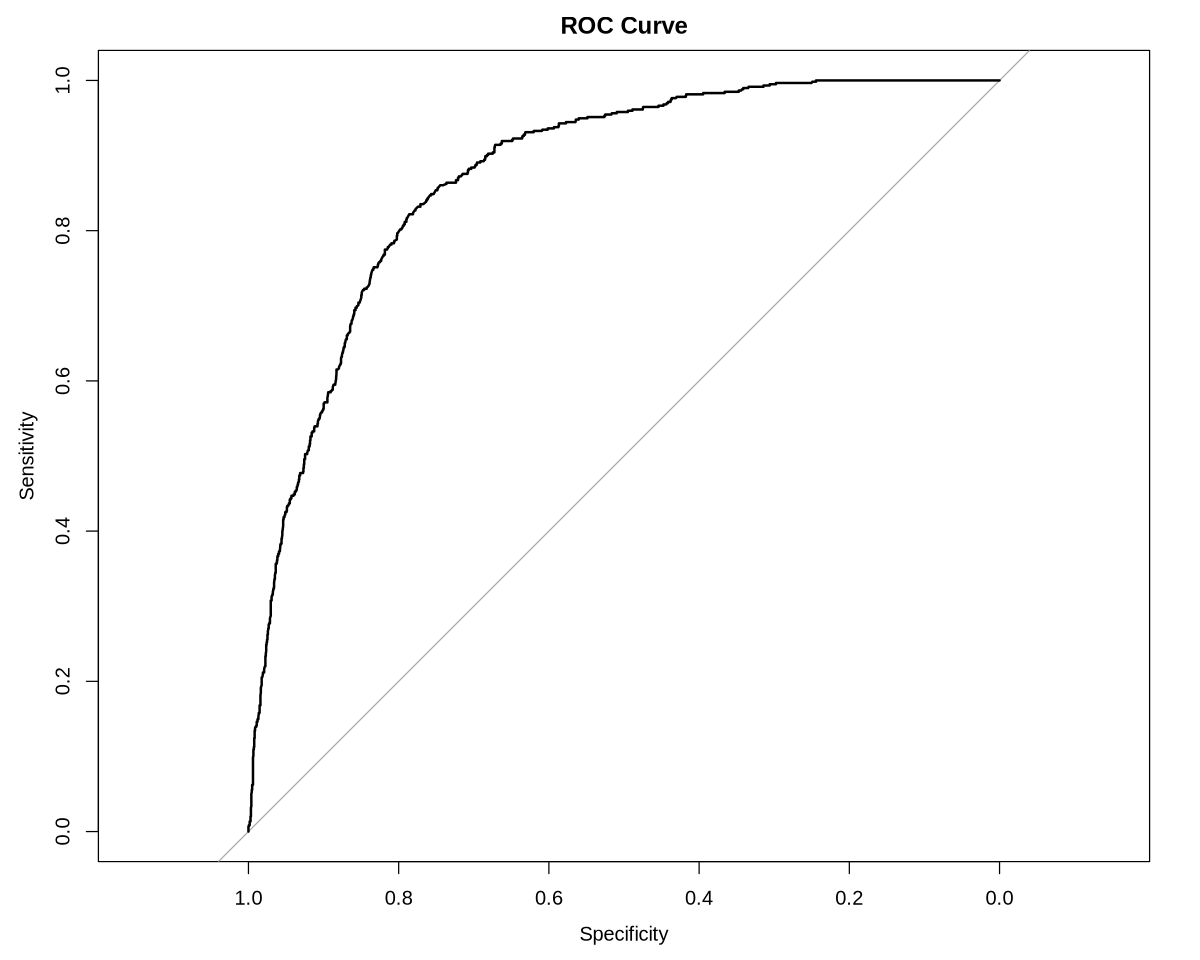

In [19]:
# Main Developer: Angela

# Install and load pROC package
#install.packages("pROC")
library(pROC)

actual_classes <- dummy_df$income
predicted_probs <- predict(full_model, type = "response")

# Calculate ROC curve
roc_curve <- roc(actual_classes, predicted_probs)

# Plot ROC curve
plot(roc_curve, main = "ROC Curve")

# Calculate AUC
auc_value <- auc(roc_curve)
print(auc_value)

The AUC (Area Under the Curve) value we obtained, 0.877, is significantly above 0.5, which indicates that our model performs better than random guessing. This also suggests that the model has strong discriminatory power and can reliably predict whether an individual's income exceeds $50,000 based on the selected predictors. This demonstrates the robustness of our model and its practical applicability in analyzing the relationship between demographic factors and income levels.

ERROR: Error in eval(expr, envir, enclos): object 'dummy_df' not found


## (4) References

Kohavi, R., & Becker, B. (1996). UCI Machine Learning Repository: Adult Data Set. Retrieved from https://archive.ics.uci.edu/ml/datasets/adult

Jo, K. (2023). Income Prediction Using Machine Learning Techniques. University of California, Los Angeles.

Azzollini, L., Breen, R., & Nolan, B. (2023). Demographic behaviour and earnings inequality across OECD countries. Journal of Economic Inequality, 21, 441-461. https://doi.org/10.1007/s10888-022-09559-1